In [76]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import imageio
import pandas as pd

In [77]:
import sklearn.datasets
data= sklearn.datasets.fetch_olivetti_faces()

In [78]:
caras = pd.DataFrame([])

for i in range(50):
    cara = data.data[i].reshape(64,64)
    caraa = pd.Series(cara.flatten(), name=i)
    caras = pd.concat([caras, caraa], axis=1)

caras = caras.T

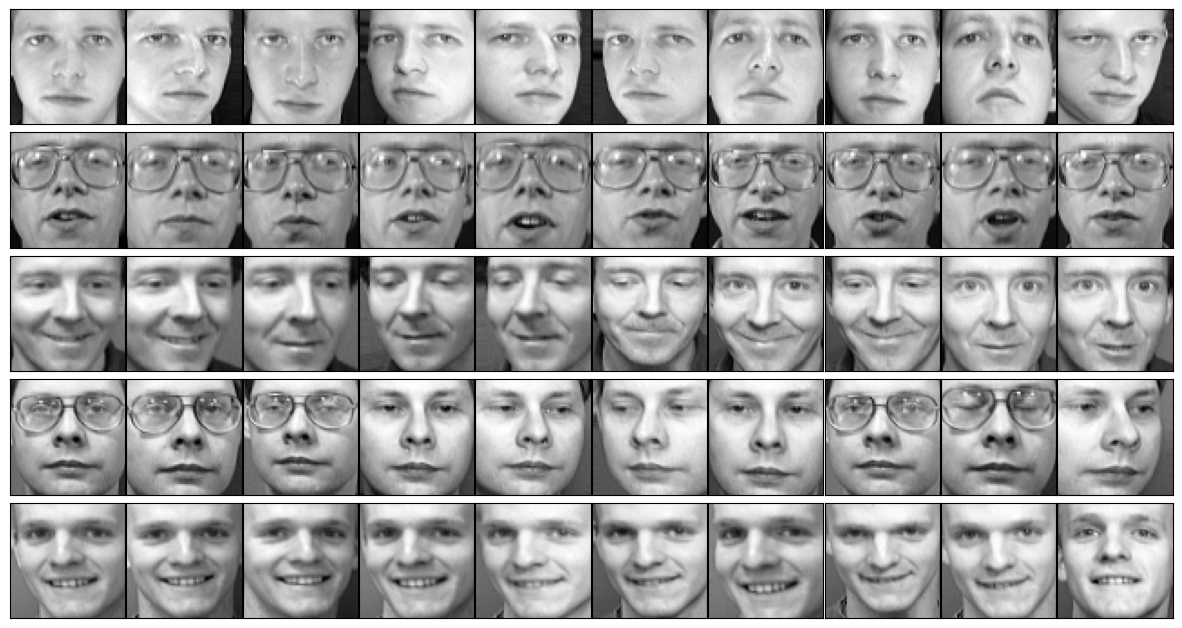

In [79]:
fig, axes = plt.subplots(5,10, figsize=(15,8),
                        subplot_kw = {'xticks': [], 'yticks': [],},
                        gridspec_kw = dict(hspace = 0.01, wspace=0.01))

for i, ax in enumerate(axes.flat):
    ax.imshow(caras.iloc[i].values.reshape(64,64),cmap='gray')

In [80]:
from sklearn.decomposition import PCA

In [81]:
caras_pca = PCA(n_components=0.85)

caras_pca.fit(caras)

,n_components,0.85
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


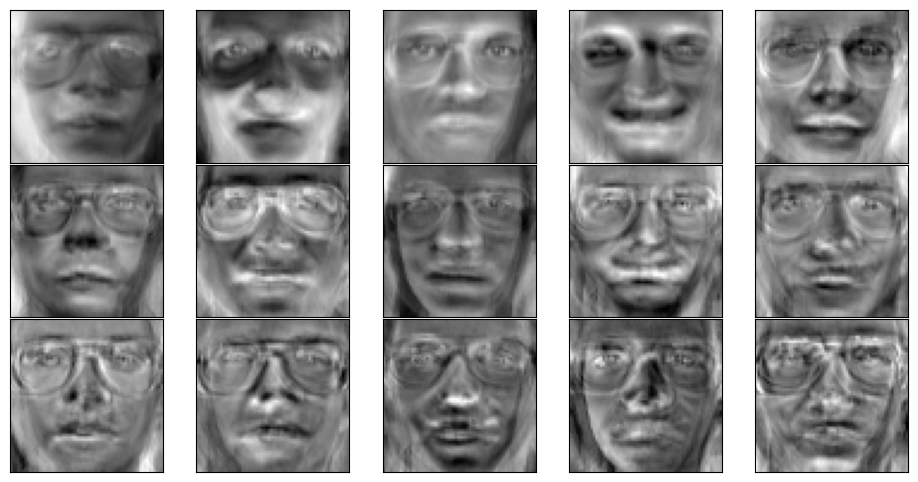

In [82]:
filas = 3
columnas = caras_pca.n_components_ // filas

fig, axes = plt.subplots(filas,columnas, figsize=(12,6),
                        subplot_kw = {'xticks': [], 'yticks': [],},
                        gridspec_kw = dict(hspace = 0.01, wspace=0.01))

for i, ax in enumerate(axes.flat):
    ax.imshow(caras_pca.components_[i].reshape(64,64),cmap='gray')

In [83]:
print(caras_pca.n_components_)

16


In [84]:
componentes = caras_pca.transform(caras)
proyeccion = caras_pca.inverse_transform(componentes)

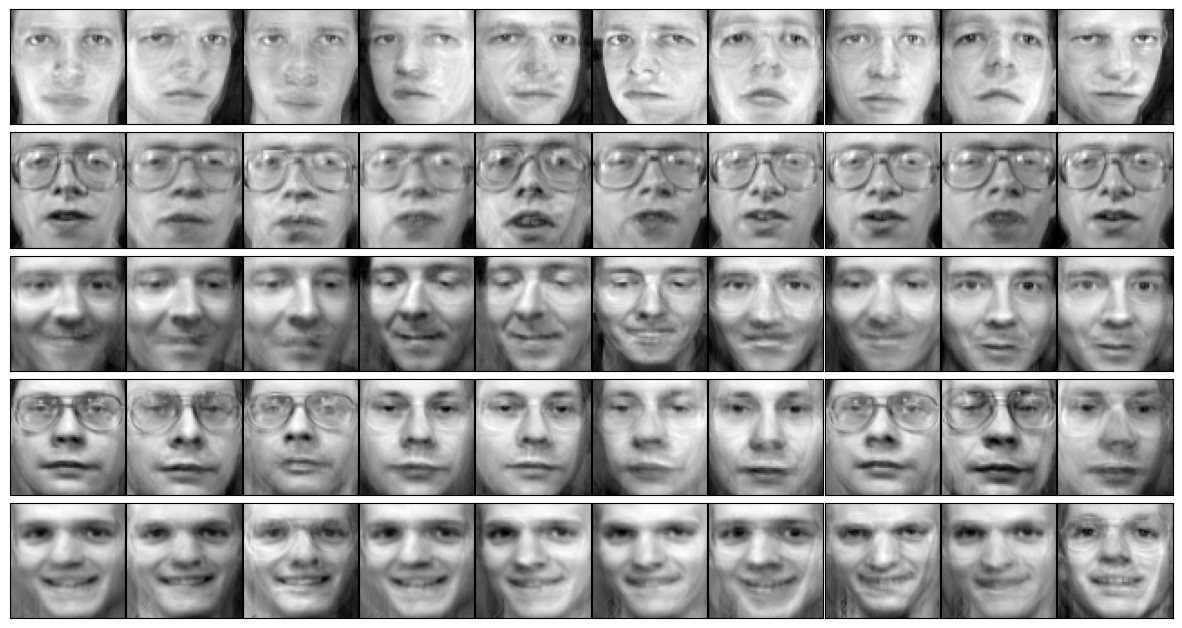

In [85]:
fig, axes = plt.subplots(5,10, figsize=(15,8),
                        subplot_kw = {'xticks': [], 'yticks': [],},
                        gridspec_kw = dict(hspace = 0.01, wspace=0.01))

for i, ax in enumerate(axes.flat):
    ax.imshow(proyeccion[i].reshape(64,64),cmap='gray')